<a href="https://colab.research.google.com/github/ATPYINACAP/AT/blob/main/AT2_U1_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Ruta al archivo Excel
file_path = '/content/drive/MyDrive/CBPR01/AT02/AT2 Instituciones de Educacion en Chile.xlsx'

# Leer el archivo Excel
df = pd.read_excel(file_path)

**ACTIVIDAD 01**

Considerando los datos de la base "Instituciones de Educacion en Chile"

In [3]:
# a) Determinar el total de instituciones educacionales del país
suma_columna = df['CANTIDAD DE PERSONAS'].sum()
print(f'El total de instituciones educacionales del país: {suma_columna}')

El total de instituciones educacionales del país: 1878642


In [4]:
# visualizar base de datos
df

,LUGAR DE ESTUDIO,CANTIDAD DE PERSONAS
0,MUNICIPAL / LOCAL / CORPORACIONES,426155
1,PARTICULAR SUBVENCIONADO,837310
2,JARDÍN INFANTIL O SALA CUNA DEL LUGAR DE TRABAJO,12187
3,CENTRO DE FORMACIÓN TÉCNICA,18966
4,INSTITUTO PROFESIONAL,160229
5,UNIVERSIDAD,423011
6,FUERZAS ARMADAS,784


In [ ]:
# b) ¿Cuantas personas estudian en un instituto profesional?
cantidad= df["CANTIDAD DE PERSONAS"][4]
print(f'La cantidad de personas estudian en un instituto profesional {cantidad}')

La cantidad de personas estudian en un instituto profesional 160229


**ACTIVIDAD 02**

Considerando la variable aleatoria

$X$ : " *Estudiantes de un instituto profesional* "

In [ ]:
# a) Determine probabilidad de éxito
p= df["CANTIDAD DE PERSONAS"][4]/df["CANTIDAD DE PERSONAS"].sum()
p=round(p,6)
print(f'La probabilidad de éxito es: {p}')

La probabilidad de éxito es: 0.08529


In [ ]:
# b) Determine probabilidad de fracaso
q=1-p
q=round(q,6)
print(f'La probabilidad de fracaso es: {q}')

La probabilidad de fracaso es: 0.91471


**ACTIVIDAD 03**

Considerando la variable aleatoria de la pregunta 02. Si se escogen, complete la tabla de distribución de probabilidades

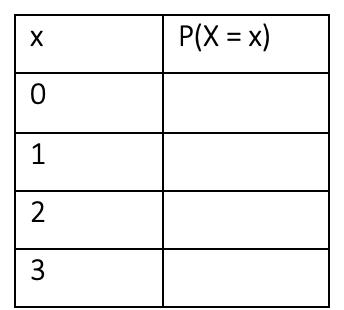